## Overapproximating ellipsoid

https://github.com/blegat/SetProg.jl/blob/master/test/Tests/invariant.jl

In [31]:
using SetProg, SetProg.Sets

P = HalfSpace([1, 1], 1) ∩ HalfSpace([-1, 0], 0) ∩ HalfSpace([0, -1], 0);
using CSDP # Optimizer

factory = with_optimizer(CSDP.Optimizer);
model = Model(factory)

@variable(model, S, Ellipsoid(point=SetProg.InteriorPoint([1.0, 0.0])))
@constraint(model, P ⊆ S)
@objective(model, Min, nth_root(volume(S)))
optimize!(model)

ErrorException: TODO

In [22]:
@variable(model, S, Ellipsoid(dimension=2))

S

In [23]:
@constraint(model, P ⊆ S)


HalfSpace([1, 1], 1) ∩ HalfSpace([-1, 0], 0) ∩ HalfSpace([0, -1], 0) ⊆ S

In [24]:
@objective(model, Min, nth_root(volume(S)))

volume^(1/n)(S)

In [25]:
optimize!(model)

ErrorException: TODO

In [7]:
?Ellipsoid

search: Ellipsoid



No documentation found.

# Summary

```
struct Ellipsoid <: AbstractVariable
```

# Fields

```
point          :: Union{Nothing, SetProg.HintPoint}
symmetric      :: Bool
dimension      :: Union{Nothing, Int64}
guaranteed_psd :: Bool
superset       :: Union{Nothing, SetProg.Sets.EllipsoidAtOrigin}
```

# Supertype Hierarchy

```
Ellipsoid <: AbstractVariable <: JuMP.AbstractVariable <: Any
```


In [122]:
using SetProg, JuMP

P = HalfSpace([1, 1.], 1.) ∩ HalfSpace([-1., 0], 0.) ∩ HalfSpace([0, -1.], 0.);
using CSDP # Optimizer
factory = with_optimizer(CSDP.Optimizer);
model = Model(factory)

@variable(model, S, Ellipsoid(point=SetProg.InteriorPoint([0.25, 0.5])))

@constraint(model, con, S ⊆ P)

@objective(model, Max, nth_root(volume(S)))

volume^(1/n)(S)

In [123]:
optimize!(model)

CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 7.71e-01 Pobj: -1.5642737e+02 Ad: 8.83e-01 Dobj:  4.4873828e+00 
Iter:  2 Ap: 8.77e-01 Pobj: -1.7011212e+02 Ad: 8.75e-01 Dobj:  5.6953006e+00 
Iter:  3 Ap: 9.19e-01 Pobj: -1.8437541e+01 Ad: 8.74e-01 Dobj:  6.4831181e+00 
Iter:  4 Ap: 9.49e-01 Pobj: -1.6267946e+00 Ad: 9.38e-01 Dobj:  5.8884391e+00 
Iter:  5 Ap: 1.00e+00 Pobj: -8.9528007e-02 Ad: 9.56e-01 Dobj:  1.9406943e+00 
Iter:  6 Ap: 1.00e+00 Pobj: -1.1356678e-03 Ad: 9.34e-01 Dobj:  2.5797977e-01 
Iter:  7 Ap: 1.00e+00 Pobj:  3.1327698e-02 Ad: 7.84e-01 Dobj:  1.1766173e-01 
Iter:  8 Ap: 1.00e+00 Pobj:  4.6250430e-02 Ad: 9.55e-01 Dobj:  6.0786358e-02 
Iter:  9 Ap: 1.00e+00 Pobj:  5.3469999e-02 Ad: 1.00e+00 Dobj:  5.4617830e-02 
Iter: 10 Ap: 1.00e+00 Pobj:  5.3970621e-02 Ad: 9.92e-01 Dobj:  5.4021227e-02 
Iter: 11 Ap: 9.99e-01 Pobj:  5.3993582e-02 Ad: 1.00e+00 Dobj:  5.3995753e-02 
Iter: 12 Ap: 1.00e+00 Pobj:  5.3994695e-02 Ad: 1.00e+

In [124]:
E = JuMP.value(S)

SetProg.Sets.PerspectiveDual{Float64,SetProg.Sets.Householder{Float64,SetProg.Sets.ShiftedEllipsoid{Float64},Float64}}(SetProg.Sets.Householder{Float64,SetProg.Sets.ShiftedEllipsoid{Float64},Float64}(SetProg.Sets.ShiftedEllipsoid{Float64}([0.0649490937276585 -0.05502980711125238; -0.05502980711125238 0.09151369451165586], [0.055314369477264924, -0.10758906449302741], -0.8707488027530735), -0.7142860131804867z² - 0.4285714928966225zx₁ - 0.5714291713508253zx₂ - 2.666725761382976e-10x₁² - 0.2857146500002947x₁x₂ - 1.0665997945968897e-9x₂², [0.25, 0.5], z, DynamicPolynomials.PolyVar{true}[x₁, x₂]))

In [125]:
E.set

SetProg.Sets.Householder{Float64,SetProg.Sets.ShiftedEllipsoid{Float64},Float64}(SetProg.Sets.ShiftedEllipsoid{Float64}([0.0649490937276585 -0.05502980711125238; -0.05502980711125238 0.09151369451165586], [0.055314369477264924, -0.10758906449302741], -0.8707488027530735), -0.7142860131804867z² - 0.4285714928966225zx₁ - 0.5714291713508253zx₂ - 2.666725761382976e-10x₁² - 0.2857146500002947x₁x₂ - 1.0665997945968897e-9x₂², [0.25, 0.5], z, DynamicPolynomials.PolyVar{true}[x₁, x₂])

In [126]:
?SetProg.HintPoint

No documentation found.

# Summary

```
abstract type SetProg.HintPoint <: Any
```

# Subtypes

```
SetProg.CenterPoint
SetProg.InteriorPoint
```


In [127]:
using Plots

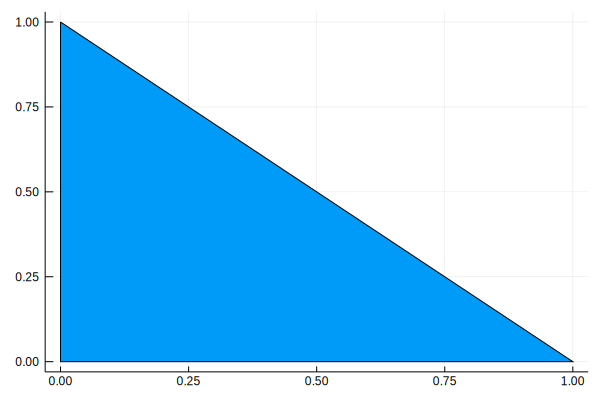

In [128]:
plot(polyhedron(P))

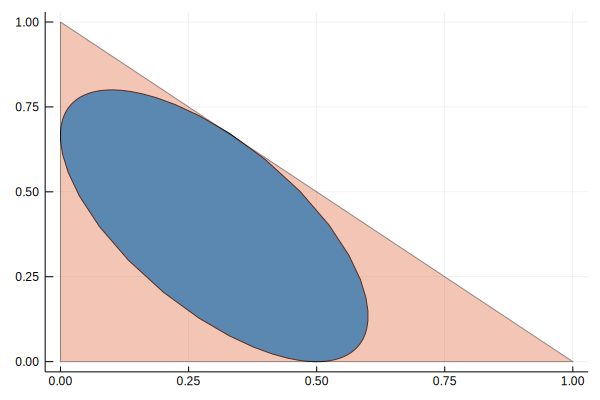

In [129]:
plot(E)
plot!(polyhedron(P), alpha=.4)

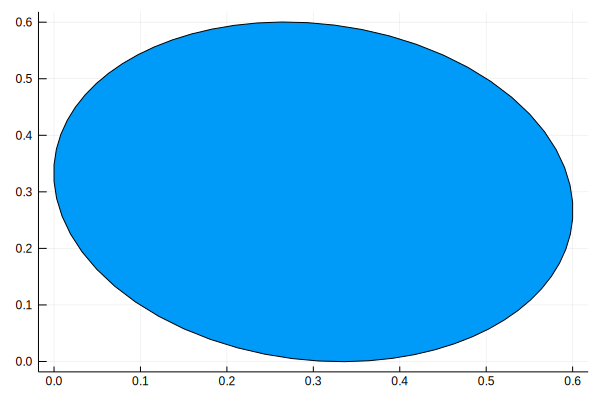

In [112]:
plot(E)